In [1]:
# coding: utf-8
import geopandas as gpd
import pandas as pd
import numpy as np
import geocoder
from shapely.geometry import Point
import matplotlib.pyplot as plt
# reference
# #http://geopandas.org/gallery/create_geopandas_from_pandas.html?highlight=from%20longitudes%20latitudes


In [2]:
fp = "/data/c03n02/cliu/data/map/bou2_4m/bou2_4p.shp"
data = gpd.read_file(fp)
# you can eliminate the CRS does not match! warning by manually setting PointsGeodataframe.crs = PolygonsGeodataframe.crs (assuming the CRSs are indeed the same for both datasets).
# However, that doesn't address the RTreeError.
# points=pd.read_csv(points_csv).dropna(subset=["Latitude", "Longitude"])

In [3]:
data.head(10)

,AREA,PERIMETER,BOU2_4M_,BOU2_4M_ID,ADCODE93,ADCODE99,NAME,geometry
0,54.447,68.489,2,23,230000,230000,ºÚÁú½­Ê¡,"POLYGON ((121.4884414672852 53.33264923095703,..."
1,129.113,129.933,3,15,150000,150000,ÄÚÃÉ¹Å×ÔÖÎÇø,"POLYGON ((121.4884414672852 53.33264923095703,..."
2,175.591,84.905,4,65,650000,650000,ÐÂ½®Î¬Îá¶û×ÔÖÎÇø,"POLYGON ((96.38328552246094 42.72695541381836,..."
3,21.315,41.186,5,22,220000,220000,¼ªÁÖÊ¡,"POLYGON ((123.1710433959961 46.24668121337891,..."
4,15.603,38.379,6,21,210000,210000,ÁÉÄþÊ¡,"POLYGON ((123.6901931762695 43.37676620483398,..."
5,41.508,76.781,7,62,620000,620000,¸ÊËàÊ¡,"POLYGON ((96.38328552246094 42.72695541381836,..."
6,19.504,44.874,8,13,130000,130000,ºÓ±±Ê¡,"POLYGON ((116.9304428100586 42.41144561767578,..."
7,1.733,8.498,9,11,110000,110000,±±¾©ÊÐ,"POLYGON ((117.4960021972656 40.66533660888672,..."
8,0.000,0.088,10,292,210000,210000,ÁÉÄþÊ¡,"POLYGON ((121.7627487182617 41.00120162963867,..."
9,0.000,0.047,11,292,210000,210000,ÁÉÄþÊ¡,"POLYGON ((121.7978973388672 40.99617767333984,..."


In [4]:
df = pd.read_csv('allsum-0.5-NaN.csv', sep=',',skiprows=0,header=0,na_values=[-99,-9999])
df['Coordinates'] = list(zip(df.lon, df.lat))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

In [5]:
# you can eliminate the CRS does not match! warning by manually setting PointsGeodataframe.crs = PolygonsGeodataframe.crs (assuming the CRSs are indeed the same for both datasets).
# However, that doesn't address the RTreeError.
# points=pd.read_csv(points_csv).dropna(subset=["Latitude", "Longitude"])
gdf.crs = data.crs
cities_with_country = gpd.sjoin(data,gdf,how="inner", op='intersects')#keep the firt geometry
cities_with_country.head()

,AREA,PERIMETER,BOU2_4M_,BOU2_4M_ID,ADCODE93,ADCODE99,NAME,geometry,index_right,lat_bin,...,row,satz,solz,sound_D(km),sound_ID,sound_hour,sumN_0.5,sumN_0.5_sumN_1.0,sumN_1.0,winNO
0,54.447,68.489,2,23,230000,230000,ºÚÁú½­Ê¡,"POLYGON ((121.4884414672852 53.33264923095703,...",3706,45.0,...,2688.000000,48.080000,31.730,NaN,NaN,NaN,243.0,1.000000,243.500000,26901.000000
0,54.447,68.489,2,23,230000,230000,ºÚÁú½­Ê¡,"POLYGON ((121.4884414672852 53.33264923095703,...",3762,45.5,...,2592.000000,48.080000,35.630,NaN,NaN,NaN,1133.0,1.000000,1133.000000,26904.000000
0,54.447,68.489,2,23,230000,230000,ºÚÁú½­Ê¡,"POLYGON ((121.4884414672852 53.33264923095703,...",3930,47.0,...,2016.000000,48.080000,37.020,NaN,NaN,NaN,1178.0,1.000000,1178.000000,31304.000000
0,54.447,68.489,2,23,230000,230000,ºÚÁú½­Ê¡,"POLYGON ((121.4884414672852 53.33264923095703,...",3985,47.5,...,1920.000000,48.080000,37.250,NaN,NaN,NaN,295.0,1.000000,295.000000,31307.000000
0,54.447,68.489,2,23,230000,230000,ºÚÁú½­Ê¡,"POLYGON ((121.4884414672852 53.33264923095703,...",3534,43.5,...,2231.466667,41.400667,30.276,NaN,NaN,NaN,1527.2,0.965333,1557.666667,29440.266667


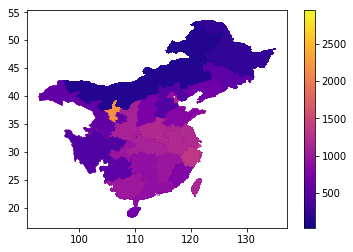

In [6]:
cities_with_country.to_csv("allsum_shp_cncity.csv",index=False,sep=',')
cities_with_country.sort_values('lat').plot('CCN_1.0_cm3', cmap='plasma',legend=True)

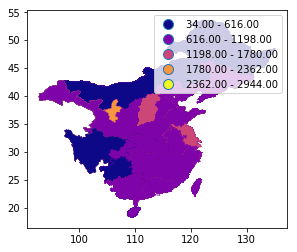

In [7]:
cities_with_country.plot('CCN_1.0_cm3',scheme='equal_interval', cmap='plasma',legend=True)

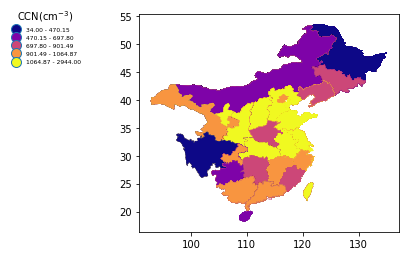

In [9]:
cities_with_country.plot('CCN_1.0_cm3',scheme='Quantiles', cmap='plasma',legend=True,\
                         legend_kwds={'frameon': False, 'loc':'best', \
                                      'bbox_to_anchor':(-0.2, 1.05),'title': 'CCN(cm$^{-3}$)', 'fontsize': 6})